In [2]:
from pathlib import Path
import numpy as np
import os
from tqdm import tqdm
from sklearn.metrics import roc_auc_score
import ujson as json
import re

from ue4nlp.ue_scores import *
from ue4nlp.ue_variation_ratio import ue_variation_ratio

from utils.plot_error_detection import * 
from utils.plot_error_detection import draw_charts
from utils.plot_error_detection import create_chart_data

import matplotlib.pyplot as plt
from utils.plot_error_detection import plot_error_detection, plot_rejection_curve_aucs

In [3]:
methods = {
    "bald": bald,
    "var_ratio": var_ratio,
    "entropy": mean_entropy,
    "sampled_max_prob": sampled_max_prob,
    "variance": probability_variance,
}

In [43]:
res_path = '../workdir/results/maha/clinc_oos/mahalanobis/bert-base-uncased/32/16/101/17'

with open(Path(res_path) / 'dev_inference.json') as f:
        model_outputs = json.load(f)

In [44]:
eval_labels = np.asarray(model_outputs['eval_labels'])
distance = np.asarray(model_outputs['mahalanobis_distance'])

In [45]:
label = (eval_labels != 42).astype('uint8')

Maha: 0.9578933333333333


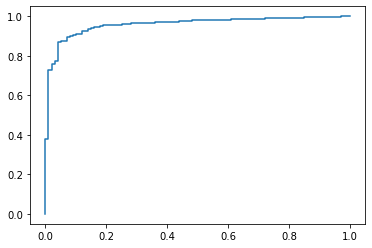

In [46]:
fpr, tpr, _ = roc_curve(label, -distance)
plt.plot(fpr, tpr, label="Maha")
print(f"Maha:", roc_auc_score(label, -distance))